In [2]:
import pandas as pd
from scipy.stats.stats import pearsonr   

/var/folders/ll/hl_x4_0155q9qf9g8rwwjyx80000gn/T/ipykernel_2570/2912469529.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [3]:
polo_df = pd.read_csv("./poloniex.csv")
binc_df = pd.read_csv("./binance.csv")

KeyboardInterrupt: 

In [ ]:
unique_polo = polo_df["instrmnt"].unique()
unique_binc = binc_df["instrmnt"].unique()

In [10]:
binc_usdt = []
for trade in unique_binc:
    if "usdt" in trade:
        binc_usdt.append(trade)

polo_usdt = []
for trade in unique_polo:
    if "usdt" in trade:
        polo_usdt.append(trade)

In [12]:
common_usdt_trades_binc_and_polo = list(set(binc_usdt).intersection(polo_usdt))

In [16]:
print(common_usdt_trades_binc_and_polo)

['doge-usdt', 'bal-usdt', 'ada-usdt', 'sushi-usdt', 'om-usdt', 'jst-usdt', 'agld-usdt', 'sun-usdt', 'trx-usdt', 'alpha-usdt', 'burger-usdt', 'aave-usdt', 'matic-usdt', '1inch-usdt', 'comp-usdt', 'ltc-usdt', 'bat-usdt', 'dot-usdt', 'axs-usdt', 'dash-usdt', 'cake-usdt', 'bnb-usdt', 'ava-usdt', 'akro-usdt', 'ghst-usdt', 'amp-usdt', 'crv-usdt', 'busd-usdt', 'avax-usdt', 'eth-usdt', 'btc-usdt', 'atom-usdt', 'uni-usdt', 'link-usdt', 'eos-usdt', 'gala-usdt', 'api3-usdt', 'sol-usdt', 'snx-usdt', 'band-usdt', 'bch-usdt', 'ftt-usdt', 'xrp-usdt', 'btcst-usdt', 'tru-usdt', 'etc-usdt', 'alice-usdt', 'bond-usdt', 'yfi-usdt']


In [26]:
for trade in common_usdt_trades_binc_and_polo:
    polo_trade = polo_df.loc[polo_df["instrmnt"] == trade]
    binc_trade = binc_df.loc[binc_df["instrmnt"] == trade]
    polo_trade.to_csv(f"./trade-files/polo/{trade}")
    binc_trade.to_csv(f"./trade-files/binc/{trade}")

In [89]:
for trade in common_usdt_trades_binc_and_polo:
    polo_trade = polo_df.loc[polo_df["instrmnt"] == trade]
    binc_trade = binc_df.loc[binc_df["instrmnt"] == trade]
    polo_trade['new_dt'] = pd.to_datetime(polo_trade["datetime"])       # convert to dt type
    binc_trade['new_dt'] = pd.to_datetime(binc_trade["datetime"])       # convert to dt type
    polo_trade["datetime_round"] = polo_trade["new_dt"].dt.floor("min")   # round datetime
    binc_trade["datetime_round"] = binc_trade["new_dt"].dt.floor("min")   # round datetime
    polo_trade = polo_trade.drop_duplicates(subset="datetime_round", keep="last")    # remove duplicates keeping closing value per min
    binc_trade = binc_trade.drop_duplicates(subset="datetime_round", keep="last")    # remove duplicates keeping closing value per min
    temp_df = pd.merge(polo_trade, binc_trade, on="datetime_round", how="inner")
    combined_df = temp_df[["datetime_round", "price_x", "price_y", "amount_x", "amount_y"]].copy()
    combined_df = combined_df.rename(columns={'datetime_round': 'datetime', 'price_x':'price_polo', 'price_y': 'price_binc', 'amount_x': 'vol_polo', 'amount_y': 'vol_binc'})
    combined_df["difference"] = abs(combined_df["price_polo"] - combined_df["price_binc"])
    combined_df = combined_df.round({'vol_polo': 4, 'vol_binc': 4})
    combined_df.to_csv(f"./trade-files/combined/{trade}.csv")


/opt/homebrew/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [60]:
# doge_df = pd.read_csv("./trade-files/combined/doge-usdt")
# doge_df.head(50)

,uid,time,trade_id,price,amount,exchange,instrmnt,vol_dllr,sell2,Class,Asset,datetime,year,hour,new_dt,datetime_round
35761,89432786,1.660522e+12,60041542,0.081536,149.381,polo,doge-usdt,12.179929,0.0,spot,doge,2022-08-15 00:00:41,2022,0,2022-08-15 00:00:41,2022-08-15 00:00:00
35763,89432788,1.660522e+12,60041544,0.081531,92.083,polo,doge-usdt,7.507619,0.0,spot,doge,2022-08-15 00:01:22,2022,0,2022-08-15 00:01:22,2022-08-15 00:01:00
35769,89432794,1.660522e+12,60041550,0.081388,109.263,polo,doge-usdt,8.892697,0.0,spot,doge,2022-08-15 00:02:46,2022,0,2022-08-15 00:02:46,2022-08-15 00:02:00
35771,89432796,1.660522e+12,60041552,0.081492,120.381,polo,doge-usdt,9.810088,0.0,spot,doge,2022-08-15 00:03:02,2022,0,2022-08-15 00:03:02,2022-08-15 00:03:00
35777,89432802,1.660522e+12,60041558,0.081326,126.764,polo,doge-usdt,10.309209,0.0,spot,doge,2022-08-15 00:04:01,2022,0,2022-08-15 00:04:01,2022-08-15 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40586,89437611,1.660608e+12,60046369,0.076678,24.904,polo,doge-usdt,1.909589,0.0,spot,doge,2022-08-15 23:54:14,2022,23,2022-08-15 23:54:14,2022-08-15 23:54:00
40589,89437614,1.660608e+12,60046372,0.076813,48.552,polo,doge-usdt,3.729425,0.0,spot,doge,2022-08-15 23:55:04,2022,23,2022-08-15 23:55:04,2022-08-15 23:55:00
40593,89437618,1.660608e+12,60046376,0.076836,24.515,polo,doge-usdt,1.883635,0.0,spot,doge,2022-08-15 23:56:10,2022,23,2022-08-15 23:56:10,2022-08-15 23:56:00
40596,89437621,1.660608e+12,60046379,0.076732,25.799,polo,doge-usdt,1.979609,0.0,spot,doge,2022-08-15 23:58:03,2022,23,2022-08-15 23:58:03,2022-08-15 23:58:00


In [51]:
polo_trade

,uid,time,trade_id,price,amount,exchange,instrmnt,vol_dllr,sell2,Class,Asset,datetime,year,hour,new_dt
35761,89432786,1.660522e+12,60041542,0.081536,149.381,polo,doge-usdt,12.179929,0.0,spot,doge,2022-08-15 00:00:41,2022,0,2022-08-15 00:00:41
35762,89432787,1.660522e+12,60041543,0.081536,15.236,polo,doge-usdt,1.242282,0.0,spot,doge,2022-08-15 00:00:41,2022,0,2022-08-15 00:00:41
35763,89432788,1.660522e+12,60041544,0.081531,92.083,polo,doge-usdt,7.507619,0.0,spot,doge,2022-08-15 00:01:22,2022,0,2022-08-15 00:01:22
35764,89432789,1.660522e+12,60041545,0.081602,50.328,polo,doge-usdt,4.106865,0.0,spot,doge,2022-08-15 00:01:29,2022,0,2022-08-15 00:01:29
35765,89432790,1.660522e+12,60041546,0.081602,0.970,polo,doge-usdt,0.079154,0.0,spot,doge,2022-08-15 00:01:33,2022,0,2022-08-15 00:01:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40599,89437624,1.660608e+12,60046382,0.076682,27.345,polo,doge-usdt,2.096869,0.0,spot,doge,2022-08-15 23:58:46,2022,23,2022-08-15 23:58:46
40600,89437625,1.660608e+12,60046383,0.076612,41.390,polo,doge-usdt,3.170971,0.0,spot,doge,2022-08-15 23:59:14,2022,23,2022-08-15 23:59:14
40601,89437626,1.660608e+12,60046384,0.076553,47.000,polo,doge-usdt,3.597991,0.0,spot,doge,2022-08-15 23:59:21,2022,23,2022-08-15 23:59:21
40602,89437627,1.660608e+12,60046385,0.076618,30.927,polo,doge-usdt,2.369565,0.0,spot,doge,2022-08-15 23:59:35,2022,23,2022-08-15 23:59:35


In [40]:
binc_trade

,uid,time,trade_id,price,amount,exchange,instrmnt,vol_dllr,sell2,Class,Asset,datetime,year,hour
22230246,30019119,1.660522e+12,434225205,0.08168,2268.0,binc,doge-usdt,185.25024,1.0,spot,doge,2022-08-15 00:00:00.584999936,2022,0
22230247,30019120,1.660522e+12,434225206,0.08168,4137.0,binc,doge-usdt,337.91016,1.0,spot,doge,2022-08-15 00:00:00.584999936,2022,0
22230248,30019121,1.660522e+12,434225207,0.08167,302.0,binc,doge-usdt,24.66434,0.0,spot,doge,2022-08-15 00:00:02.191000064,2022,0
22230249,30019122,1.660522e+12,434225208,0.08167,11750.0,binc,doge-usdt,959.62250,0.0,spot,doge,2022-08-15 00:00:04.456000000,2022,0
22230250,30019123,1.660522e+12,434225209,0.08167,4361.0,binc,doge-usdt,356.16287,0.0,spot,doge,2022-08-15 00:00:04.456000000,2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22507797,30296670,1.660608e+12,434502698,0.07663,557.0,binc,doge-usdt,42.68291,0.0,spot,doge,2022-08-15 23:59:52.830000128,2022,23
22507798,30296671,1.660608e+12,434502699,0.07663,2218.0,binc,doge-usdt,169.96534,0.0,spot,doge,2022-08-15 23:59:53.980000000,2022,23
22507800,30296673,1.660608e+12,434502700,0.07663,2782.0,binc,doge-usdt,213.18466,0.0,spot,doge,2022-08-15 23:59:53.980000000,2022,23
22507801,30296674,1.660608e+12,434502701,0.07663,7611.0,binc,doge-usdt,583.23093,0.0,spot,doge,2022-08-15 23:59:53.993999872,2022,23


In [9]:
# Graph binc and polo for doge
linch_df = pd.read_csv("./trade-files/combined/1inch-usdt.csv")
aave_df = pd.read_csv("./trade-files/combined/aave-usdt.csv")
ada_df = pd.read_csv("./trade-files/combined/ada-usdt.csv")
agld_df = pd.read_csv("./trade-files/combined/agld-usdt.csv")
akro_df = pd.read_csv("./trade-files/combined/akro-usdt.csv")
alice_df = pd.read_csv("./trade-files/combined/alice-usdt.csv")
alpha_df = pd.read_csv("./trade-files/combined/alpha-usdt.csv")
amp_df = pd.read_csv("./trade-files/combined/amp-usdt.csv")
api3_df = pd.read_csv("./trade-files/combined/api3-usdt.csv")
atom_df = pd.read_csv("./trade-files/combined/atom-usdt.csv")
ava_df = pd.read_csv("./trade-files/combined/ava-usdt.csv")
avax_df = pd.read_csv("./trade-files/combined/avax-usdt.csv")
axs_df = pd.read_csv("./trade-files/combined/axs-usdt.csv")
bal_df = pd.read_csv("./trade-files/combined/bal-usdt.csv")
band_df = pd.read_csv("./trade-files/combined/band-usdt.csv")
bat_df = pd.read_csv("./trade-files/combined/bat-usdt.csv")
bch_df = pd.read_csv("./trade-files/combined/bch-usdt.csv")
bnb_df = pd.read_csv("./trade-files/combined/bnb-usdt.csv")
bond_df = pd.read_csv("./trade-files/combined/bond-usdt.csv")
btc_df = pd.read_csv("./trade-files/combined/btc-usdt.csv")
btcst_df = pd.read_csv("./trade-files/combined/btcst-usdt.csv")
burger_df = pd.read_csv("./trade-files/combined/burger-usdt.csv")
busd_df = pd.read_csv("./trade-files/combined/busd-usdt.csv")
cake_df = pd.read_csv("./trade-files/combined/cake-usdt.csv")
comp_df = pd.read_csv("./trade-files/combined/comp-usdt.csv")
crv_df = pd.read_csv("./trade-files/combined/crv-usdt.csv")
dash_df = pd.read_csv("./trade-files/combined/dash-usdt.csv")
doge_df = pd.read_csv("./trade-files/combined/doge-usdt.csv")
dot_df = pd.read_csv("./trade-files/combined/dot-usdt.csv")
eos_df = pd.read_csv("./trade-files/combined/eos-usdt.csv")
etc_df = pd.read_csv("./trade-files/combined/etc-usdt.csv")
eth_df = pd.read_csv("./trade-files/combined/eth-usdt.csv")
ftt_df = pd.read_csv("./trade-files/combined/ftt-usdt.csv")
gala_df = pd.read_csv("./trade-files/combined/gala-usdt.csv")
ghst_df = pd.read_csv("./trade-files/combined/ghst-usdt.csv")
jst_df = pd.read_csv("./trade-files/combined/jst-usdt.csv")
link_df = pd.read_csv("./trade-files/combined/link-usdt.csv")
ltc_df = pd.read_csv("./trade-files/combined/ltc-usdt.csv")
matic_df = pd.read_csv("./trade-files/combined/matic-usdt.csv")
om_df = pd.read_csv("./trade-files/combined/om-usdt.csv")
snx_df = pd.read_csv("./trade-files/combined/snx-usdt.csv")
sol_df = pd.read_csv("./trade-files/combined/sol-usdt.csv")
sun_df = pd.read_csv("./trade-files/combined/sun-usdt.csv")
sushi_df = pd.read_csv("./trade-files/combined/sushi-usdt.csv")
tru_df = pd.read_csv("./trade-files/combined/tru-usdt.csv")
trx_df = pd.read_csv("./trade-files/combined/trx-usdt.csv")
uni_df = pd.read_csv("./trade-files/combined/uni-usdt.csv")
xrp_df = pd.read_csv("./trade-files/combined/xrp-usdt.csv")
yfi_df = pd.read_csv("./trade-files/combined/yfi-usdt.csv")

/opt/homebrew/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:title={'center':'XRP-USDT'}, xlabel='datetime'>

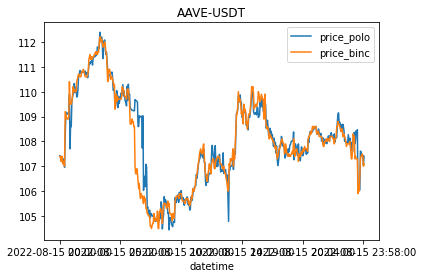

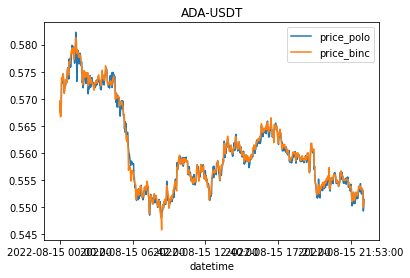

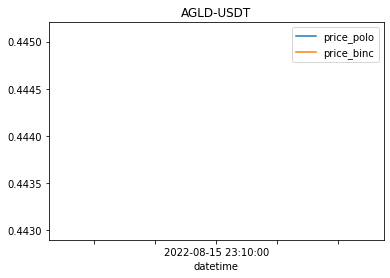

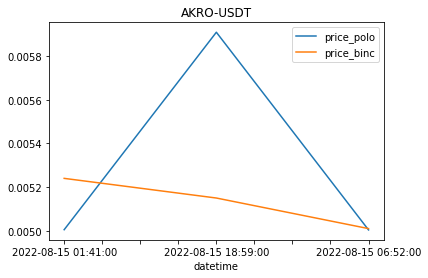

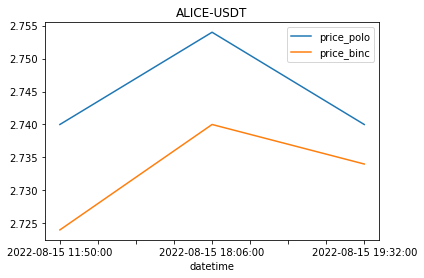

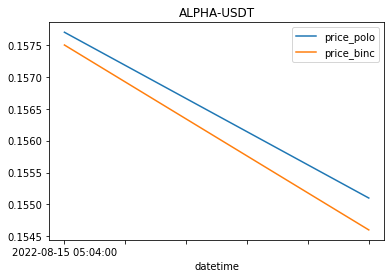

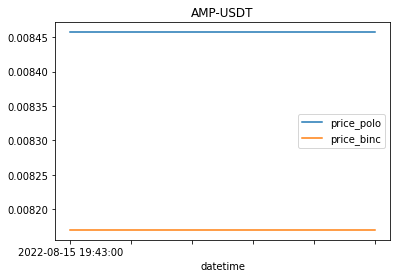

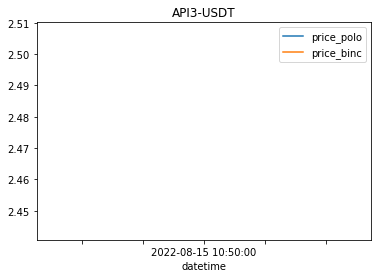

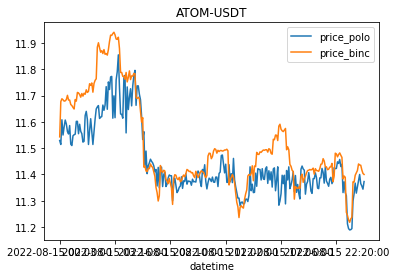

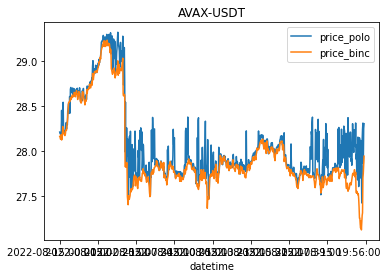

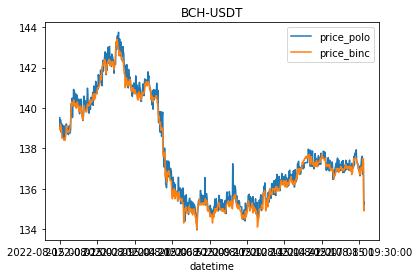

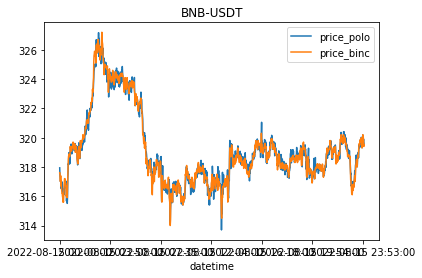

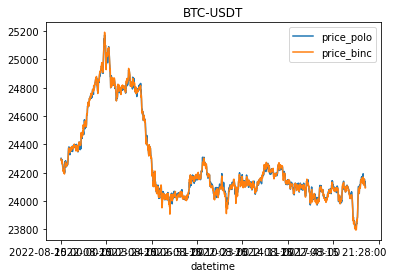

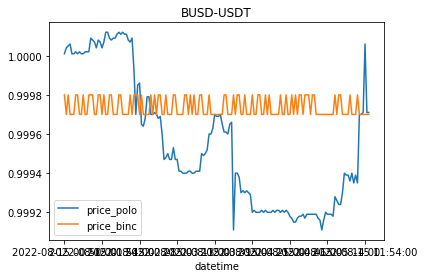

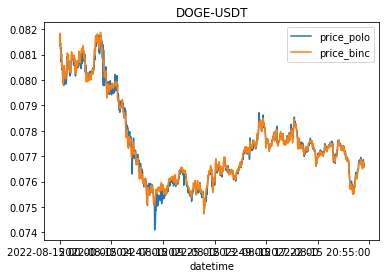

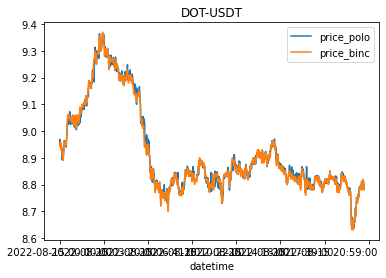

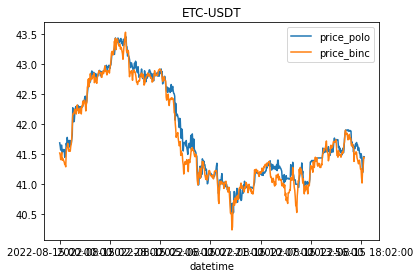

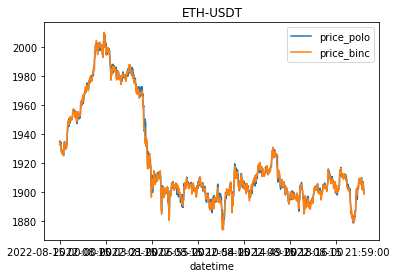

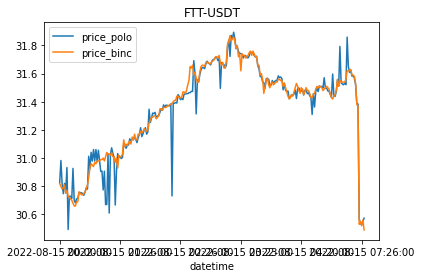

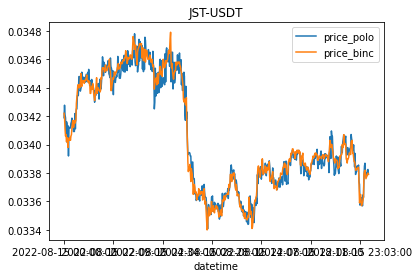

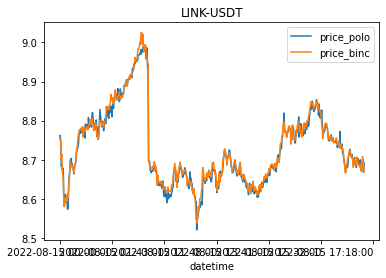

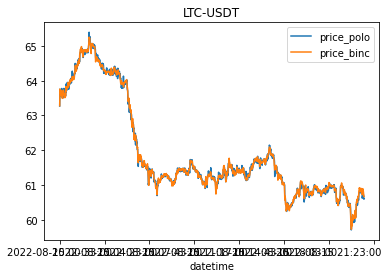

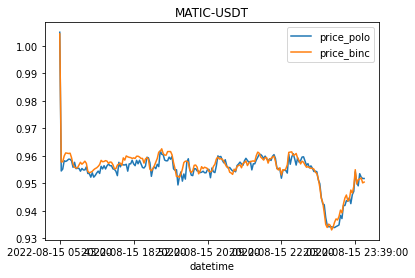

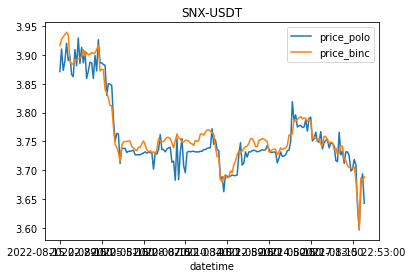

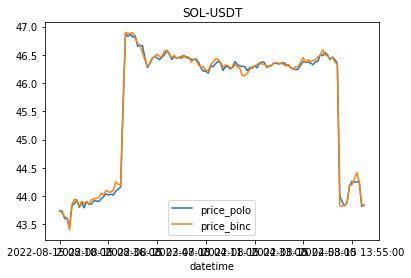

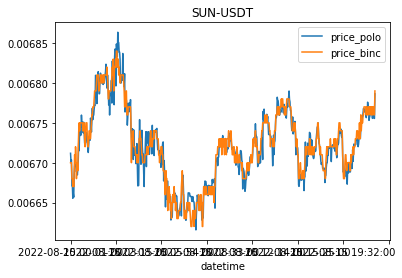

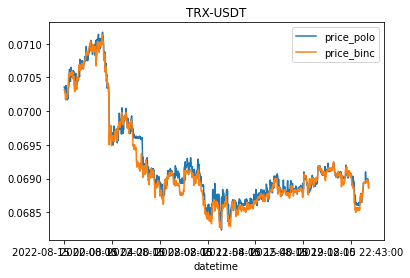

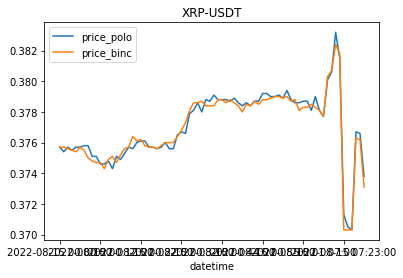

In [5]:
# linch_df.plot(x="datetime", y=["price_polo", "price_binc"], title="1inch-USDT")
aave_df.plot(x="datetime", y=["price_polo", "price_binc"], title="AAVE-USDT")
ada_df.plot(x="datetime", y=["price_polo", "price_binc"], title="ADA-USDT")
agld_df.plot(x="datetime", y=["price_polo", "price_binc"], title="AGLD-USDT")
akro_df.plot(x="datetime", y=["price_polo", "price_binc"], title="AKRO-USDT")
alice_df.plot(x="datetime", y=["price_polo", "price_binc"], title="ALICE-USDT")
alpha_df.plot(x="datetime", y=["price_polo", "price_binc"], title="ALPHA-USDT")
amp_df.plot(x="datetime", y=["price_polo", "price_binc"], title="AMP-USDT")
api3_df.plot(x="datetime", y=["price_polo", "price_binc"], title="API3-USDT")
atom_df.plot(x="datetime", y=["price_polo", "price_binc"], title="ATOM-USDT")
# ava_df.plot(x="datetime", y=["price_polo", "price_binc"], title="AVA-USDT")
avax_df.plot(x="datetime", y=["price_polo", "price_binc"], title="AVAX-USDT")
# axs_df.plot(x="datetime", y=["price_polo", "price_binc"], title="AXS-USDT")
# bal_df.plot(x="datetime", y=["price_polo", "price_binc"], title="BAL-USDT")
# band_df.plot(x="datetime", y=["price_polo", "price_binc"], title="BAND-USDT")
# bat_df.plot(x="datetime", y=["price_polo", "price_binc"], title="BAT-USDT")
bch_df.plot(x="datetime", y=["price_polo", "price_binc"], title="BCH-USDT")
bnb_df.plot(x="datetime", y=["price_polo", "price_binc"], title="BNB-USDT")
# bond_df.plot(x="datetime", y=["price_polo", "price_binc"], title="BOND-USDT")
btc_df.plot(x="datetime", y=["price_polo", "price_binc"], title="BTC-USDT")
# btcst_df.plot(x="datetime", y=["price_polo", "price_binc"], title="BTCST-USDT")
# burger_df.plot(x="datetime", y=["price_polo", "price_binc"], title="BURGER-USDT")
busd_df.plot(x="datetime", y=["price_polo", "price_binc"], title="BUSD-USDT")
# cake_df.plot(x="datetime", y=["price_polo", "price_binc"], title="CAKE-USDT")
# comp_df.plot(x="datetime", y=["price_polo", "price_binc"], title="COMP-USDT")
# crv_df.plot(x="datetime", y=["price_polo", "price_binc"], title="CRV-USDT")
# dash_df.plot(x="datetime", y=["price_polo", "price_binc"], title="DASH-USDT")
doge_df.plot(x="datetime", y=["price_polo", "price_binc"], title="DOGE-USDT")
dot_df.plot(x="datetime", y=["price_polo", "price_binc"], title="DOT-USDT")
# eos_df.plot(x="datetime", y=["price_polo", "price_binc"], title="EOS-USDT")
etc_df.plot(x="datetime", y=["price_polo", "price_binc"], title="ETC-USDT")
eth_df.plot(x="datetime", y=["price_polo", "price_binc"], title="ETH-USDT")
ftt_df.plot(x="datetime", y=["price_polo", "price_binc"], title="FTT-USDT")
# gala_df.plot(x="datetime", y=["price_polo", "price_binc"], title="GALA-USDT")
# ghst_df.plot(x="datetime", y=["price_polo", "price_binc"], title="GHST-USDT")
jst_df.plot(x="datetime", y=["price_polo", "price_binc"], title="JST-USDT")
link_df.plot(x="datetime", y=["price_polo", "price_binc"], title="LINK-USDT")
ltc_df.plot(x="datetime", y=["price_polo", "price_binc"], title="LTC-USDT")
matic_df.plot(x="datetime", y=["price_polo", "price_binc"], title="MATIC-USDT")
# om_df.plot(x="datetime", y=["price_polo", "price_binc"], title="OM-USDT")
snx_df.plot(x="datetime", y=["price_polo", "price_binc"], title="SNX-USDT")
sol_df.plot(x="datetime", y=["price_polo", "price_binc"], title="SOL-USDT")
sun_df.plot(x="datetime", y=["price_polo", "price_binc"], title="SUN-USDT")
# sushi_df.plot(x="datetime", y=["price_polo", "price_binc"], title="SUSHI-USDT")
# tru_df.plot(x="datetime", y=["price_polo", "price_binc"], title="TRU-USDT")
trx_df.plot(x="datetime", y=["price_polo", "price_binc"], title="TRX-USDT")
# uni_df.plot(x="datetime", y=["price_polo", "price_binc"], title="UNI-USDT")
xrp_df.plot(x="datetime", y=["price_polo", "price_binc"], title="XRP-USDT")
# yfi_df.plot(x="datetime", y=["price_polo", "price_binc"], title="YFI-USDT")

In [10]:
atom_df.head(60)

,Unnamed: 0,datetime,price_polo,price_binc,vol_polo,vol_binc,difference
0,0,2022-08-15 00:03:00,11.529,11.543,0.1712,1.03,0.014
1,1,2022-08-15 00:51:00,11.514,11.677,0.6481,1.28,0.163
2,2,2022-08-15 00:52:00,11.608,11.688,0.4663,5.20,0.080
3,3,2022-08-15 00:53:00,11.550,11.684,0.4628,23.23,0.134
4,4,2022-08-15 00:54:00,11.581,11.679,0.5397,5.00,0.098
5,5,2022-08-15 00:55:00,11.607,11.680,0.2921,1.75,0.073
6,6,2022-08-15 00:56:00,11.592,11.685,1.0399,10.76,0.093
7,7,2022-08-15 00:57:00,11.563,11.701,0.0139,3.22,0.138
8,8,2022-08-15 01:20:00,11.554,11.683,0.2091,10.00,0.129
9,9,2022-08-15 01:21:00,11.586,11.683,0.7680,1.43,0.097


Corr: (-0.07805282644271151, 0.1985515614057162)


<AxesSubplot:title={'center':'ATOM Price vs Vol'}, xlabel='vol_polo', ylabel='price_polo'>

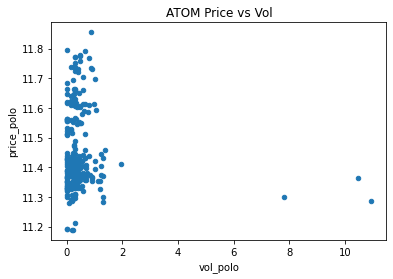

In [111]:
new_atom = atom_df.sort_values('vol_binc')
price = new_atom['price_binc'].values.tolist()
vol = new_atom['vol_binc'].values.tolist()
length = len(price)
price = price[0:length-3]
vol = vol[3:length]
print("Corr:", pearsonr(vol, price))
new_atom.plot.scatter(x='vol_polo', y='price_polo', title='ATOM Price vs Vol')

In [87]:
busd_df.head(60)

,Unnamed: 0,datetime,price_polo,price_binc,vol_polo,vol_binc,difference
0,0,2022-08-15 00:50:00,1.00001,0.9998,16.8570,50.0,0.00021
1,1,2022-08-15 00:51:00,1.00004,0.9997,57.0486,43.0,0.00034
2,2,2022-08-15 00:52:00,1.00005,0.9998,36.1841,13.0,0.00025
3,3,2022-08-15 00:53:00,1.00006,0.9997,18.5188,535.0,0.00036
4,4,2022-08-15 01:38:00,1.00001,0.9997,37.1130,570.0,0.00031
5,5,2022-08-15 01:39:00,1.00001,0.9997,13.6078,197.0,0.00031
6,6,2022-08-15 01:40:00,1.00002,0.9998,16.9955,34.0,0.00022
7,7,2022-08-15 01:41:00,1.00001,0.9998,5.6920,1353.0,0.00021
8,8,2022-08-15 01:42:00,1.00002,0.9997,17.5351,115.0,0.00032
9,9,2022-08-15 01:43:00,1.00001,0.9997,12.7046,303.0,0.00031


In [8]:
print(atom_df['vol_binc'].sum())
print(atom_df['vol_polo'].sum())

3237.0299999999997
124.19990000000001
